# Model Training

The focus of this notebook will be to train the model using the data prepared in the data-prep notebook.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.tabular import *

In [3]:
dtypes = {
    'id':'category',
    'item_id':'category',
    'dept_id':'category',
    'cat_id':'category',
    'store_id':'category',
    'state_id':'category',
    'd':'category',
    'value':'int32',
    'date':'category',
    'wm_yr_wk':'int64',
    'weekday':'category',
    'wday':'category',
    'month':'category',
    'year':'category',
    'event_name_1':'category',
    'event_type_1':'category',
    'event_name_2':'category',
    'event_type_2':'category',
    'snap_CA':'bool',
    'snap_TX':'bool',
    'snap_WI':'bool',
    'Year':'category',
    'Month':'category',
    'Week':'category',
    'Day':'category',
    'Dayofweek':'category',
    'Dayofyear':'category',
    'Is_month_end':'bool',
    'Is_month_start':'bool',
    'Is_quarter_end':'bool',
    'Is_quarter_start':'bool',
    'Is_year_end':'bool',
    'Is_year_start':'bool',
    'sell_price':'float32',
}

In [4]:
data_path = Path('./data/')
%time train_df = pd.read_csv(data_path/'merge_3.csv', dtype=dtypes)
#train_df = pd.read_csv(data_path/'merge_3.csv')
#train_df = next(pd.read_csv(data_path/'merge_3.csv', chunksize=10000))

CPU times: user 4min 17s, sys: 18 s, total: 4min 35s
Wall time: 4min 36s


In [5]:
train_df.head().T

,0,1,2,3,4
id,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation
item_id,HOBBIES_1_001,HOBBIES_1_002,HOBBIES_1_003,HOBBIES_1_004,HOBBIES_1_005
dept_id,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1
cat_id,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES
store_id,CA_1,CA_1,CA_1,CA_1,CA_1
state_id,CA,CA,CA,CA,CA
d,d_1,d_1,d_1,d_1,d_1
value,0,0,0,0,0
date,2011-01-29,2011-01-29,2011-01-29,2011-01-29,2011-01-29
wm_yr_wk,11101,11101,11101,11101,11101


### Experimenting with a sample

In [8]:
n = len(train_df)

In [7]:
idx = np.random.permutation(range(n))[:2000]

In [13]:
idx.sort()
small_train_df = train_df.iloc[idx[:1000]]
small_test_df = train_df.iloc[idx[1000:]]
small_cat_vars = ['store_id', 'dept_id', 'Dayofweek']
small_cont_vars = ['value', 'sell_price']
small_train_df = small_train_df[small_cat_vars + small_cont_vars]
small_test_df = small_test_df[small_cat_vars + small_cont_vars ]

In [14]:
small_train_df.head()

,store_id,dept_id,Dayofweek,value,sell_price
2013,CA_1,FOODS_2,5,0,NaN
7001,CA_3,HOUSEHOLD_1,5,0,3.72
23776,WI_1,FOODS_3,5,0,NaN
25715,WI_2,HOUSEHOLD_2,5,0,NaN
66963,CA_2,FOODS_3,0,0,0.20


In [15]:
small_test_df.head()

,store_id,dept_id,Dayofweek,value,sell_price
30085033,WI_1,HOBBIES_2,4,0,0.45
30101062,CA_3,HOUSEHOLD_2,5,1,1.24
30151770,WI_3,HOBBIES_1,6,0,1.77
30155972,CA_1,HOUSEHOLD_2,0,0,1.98
30163163,CA_3,FOODS_3,0,8,5.48


In [16]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test=True)

In [17]:
small_test_df.head()

,store_id,dept_id,Dayofweek,value,sell_price
30085033,WI_1,HOBBIES_2,4,0,0.45
30101062,CA_3,HOUSEHOLD_2,5,1,1.24
30151770,WI_3,HOBBIES_1,6,0,1.77
30155972,CA_1,HOUSEHOLD_2,0,0,1.98
30163163,CA_3,FOODS_3,0,8,5.48


In [18]:
small_train_df.store_id.cat.categories

Index(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2',
       'WI_3'],
      dtype='object')

In [19]:
fill_missing = FillMissing(small_cat_vars, small_cont_vars)
fill_missing(small_train_df)
fill_missing(small_test_df, test=True)

### Prepare full dataset

In [6]:
procs = [FillMissing, Categorify, Normalize]

In [7]:
cat_vars = ["id","item_id","dept_id","cat_id","store_id","state_id",
            "d","date","wm_yr_wk","weekday","wday","month","year",
            "event_name_1","event_type_1","event_name_2",
            "event_type_2","snap_CA","snap_TX","snap_WI","Year",
            "Month","Week","Day","Dayofweek","Dayofyear",
            "Is_month_end","Is_month_start","Is_quarter_end",
            "Is_quarter_start","Is_year_end","Is_year_start"]
cont_vars = ['sell_price']

In [8]:
dep_var = 'value'

In [9]:
valid_idx = range(int(len(train_df) * 0.8), len(train_df))
print(valid_idx)

range(46661896, 58327370)


In [10]:
data = (TabularList.from_df(train_df, path=data_path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var, label_cls=FloatList)
                .databunch())

In [11]:
max_log_y = np.log(np.max(train_df['value'])*1.2)

In [12]:
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [13]:
max_log_y, y_range

(6.819579588078412, tensor([0.0000, 6.8196], device='cuda:0'))

In [14]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=exp_rmspe)

In [15]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(30491, 519)
    (1): Embedding(3050, 143)
    (2): Embedding(8, 5)
    (3): Embedding(4, 3)
    (4): Embedding(11, 6)
    (5): Embedding(4, 3)
    (6): Embedding(1914, 110)
    (7): Embedding(1914, 110)
    (8): Embedding(220, 33)
    (9): Embedding(8, 5)
    (10): Embedding(8, 5)
    (11): Embedding(13, 7)
    (12): Embedding(7, 5)
    (13): Embedding(32, 11)
    (14): Embedding(6, 4)
    (15): Embedding(6, 4)
    (16): Embedding(4, 3)
    (17): Embedding(3, 3)
    (18): Embedding(3, 3)
    (19): Embedding(3, 3)
    (20): Embedding(7, 5)
    (21): Embedding(13, 7)
    (22): Embedding(54, 15)
    (23): Embedding(32, 11)
    (24): Embedding(8, 5)
    (25): Embedding(367, 44)
    (26): Embedding(3, 3)
    (27): Embedding(3, 3)
    (28): Embedding(3, 3)
    (29): Embedding(3, 3)
    (30): Embedding(3, 3)
    (31): Embedding(3, 3)
    (32): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(1, e

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


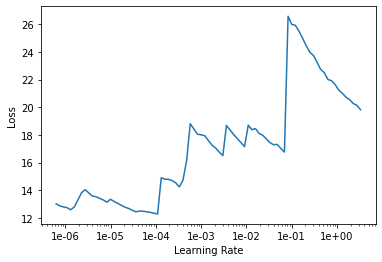

In [17]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(5, 1e-5, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time


Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/vishaladu/anaconda3/lib/python3.7/threading.py", line 917, in _bootstrap_inner
    self.run()
  File "/home/vishaladu/anaconda3/lib/python3.7/threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "/home/vishaladu/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/pin_memory.py", line 25, in _pin_memory_loop
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/home/vishaladu/anaconda3/lib/python3.7/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "/home/vishaladu/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 294, in rebuild_storage_fd
    fd = df.detach()
  File "/home/vishaladu/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/vishaladu/anaconda3/lib/python3.7/multiprocessing/res

KeyboardInterrupt: 